In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]='2'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score, classification_report, confusion_matrix, accuracy_score

import sys
sys.path.append('/home/bis/2021_SJH_detectability/DbyDeep')
from RefModel.model_DeepMSpeptide import load_pep_and_codify

In [2]:
print('Loading model...')
model_2_1D = keras.models.load_model('/home/bis/2021_SJH_detectability/DbyDeep/log/model_DeepMspeptide.h5')
# retrained

Loading model...
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
df_massive=pd.read_csv('/data/2021_SJH_detectability/data_human/train.csv')
df_merge=pd.DataFrame(df_massive.peptide.unique(), columns=['peptide'])
df_merge['Drop']=True
df_hpp=pd.read_csv('/data/2021_SJH_detectability/data_human/HPP.csv')

# Cross species : Mouse

Loading input peptides
Succesfully loaded 1255210 peptides and skipped 0
1255210/1255210 [==============================] - 166s 132us/sample - loss: 0.6731 - acc: 0.6861 - binary_crossentropy: 0.6731
Test Accuracy: [0.6731028228758619, 0.6860804, 0.6731021]
Test AUC : 0.905758824626766
              precision    recall  f1-score   support

       False     0.9970    0.6741    0.8043   1201513
        True     0.1157    0.9543    0.2064     53697

    accuracy                         0.6861   1255210
   macro avg     0.5563    0.8142    0.5054   1255210
weighted avg     0.9593    0.6861    0.7788   1255210



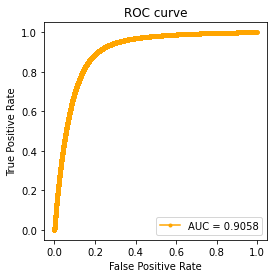

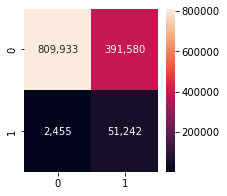

In [4]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/mouse_eph4/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_KLife_DeepMSpeptide_fpr_msgfplus.npy', fpr)
np.save('log/result_mouse_KLife_DeepMSpeptide_tpr_msgfplus.npy', tpr)
np.save('log/result_mouse_KLife_DeepMSpeptide_threshold_msgfplus.npy', threshold)
np.save('log/result_mouse_KLife_DeepMSpeptide_prob_msgfplus.npy', probs)
np.save('log/result_mouse_KLife_DeepMSpeptide_true_msgfplus.npy', y_test)

Loading input peptides
Succesfully loaded 1139482 peptides and skipped 0
1139482/1139482 [==============================] - 118s 104us/sample - loss: 0.6924 - acc: 0.6817 - binary_crossentropy: 0.6924
Test Accuracy: [0.6923747959860428, 0.68165183, 0.69236887]
Test AUC : 0.8759942743084141
              precision    recall  f1-score   support

       False     0.9950    0.6711    0.8015   1091666
        True     0.1095    0.9234    0.1958     47816

    accuracy                         0.6817   1139482
   macro avg     0.5523    0.7972    0.4987   1139482
weighted avg     0.9579    0.6817    0.7761   1139482



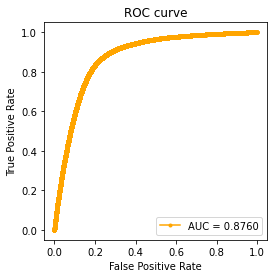

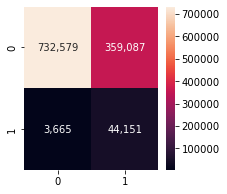

In [5]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/mouse_tmuscle/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

df_test = df_test[df_test.peptide.apply(lambda x: 'B' not in x)].reset_index(drop=True)
df_test = df_test[df_test.peptide.apply(lambda x: 'Z' not in x)].reset_index(drop=True)

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_fpr_msgfplus.npy', fpr)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_tpr_msgfplus.npy', tpr)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_threshold_msgfplus.npy', threshold)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_prob_msgfplus.npy', probs)
np.save('log/result_mouse_SkeletaMuscle_DeepMSpeptide_true_msgfplus.npy', y_test)

# Cross species : Human

Loading input peptides
Succesfully loaded 1295085 peptides and skipped 0
Test AUC : 0.8814990152953899
              precision    recall  f1-score   support

       False     0.9948    0.7065    0.8262   1245379
        True     0.1098    0.9075    0.1960     49706

    accuracy                         0.7142   1295085
   macro avg     0.5523    0.8070    0.5111   1295085
weighted avg     0.9608    0.7142    0.8020   1295085



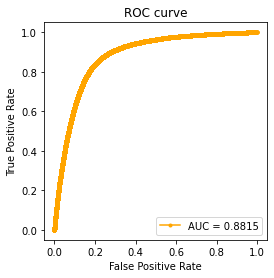

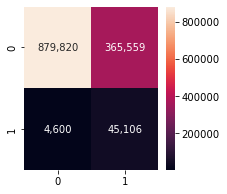

In [6]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/human_hek293/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i >= 0.5 else 0 for i in probs]
# acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
# print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HEK293_DeepMSpeptide_fpr_msgfplus.npy', fpr)
np.save('log/result_human_HEK293_DeepMSpeptide_tpr_msgfplus.npy', tpr)
np.save('log/result_human_HEK293_DeepMSpeptide_threshold_msgfplus.npy', threshold)
np.save('log/result_human_HEK293_DeepMSpeptide_prob_msgfplus.npy', probs)
np.save('log/result_human_HEK293_DeepMSpeptide_true_msgfplus.npy', y_test)

Loading input peptides
Succesfully loaded 760506 peptides and skipped 0
Test AUC : 0.8784830484119946
              precision    recall  f1-score   support

       False     0.9959    0.7092    0.8285    742101
        True     0.0700    0.8822    0.1297     18405

    accuracy                         0.7134    760506
   macro avg     0.5329    0.7957    0.4791    760506
weighted avg     0.9735    0.7134    0.8116    760506



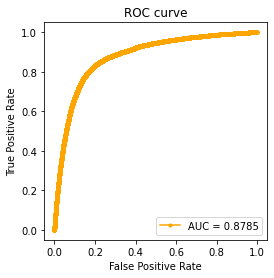

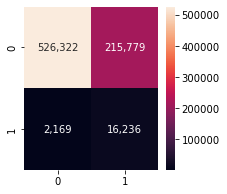

In [7]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/human_liver/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i >= 0.5 else 0 for i in probs]
# acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
# print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_human_HmapLiver_DeepMSpeptide_fpr_msgfplus.npy', fpr)
np.save('log/result_human_HmapLiver_DeepMSpeptide_tpr_msgfplus.npy', tpr)
np.save('log/result_human_HmapLiver_DeepMSpeptide_threshold_msgfplus.npy', threshold)
np.save('log/result_human_HmapLiver_DeepMSpeptide_prob_msgfplus.npy', probs)
np.save('log/result_human_HmapLiver_DeepMSpeptide_true_msgfplus.npy', y_test)

# Yeast

Loading input peptides
Succesfully loaded 640596 peptides and skipped 0
640596/640596 [==============================] - 68s 106us/sample - loss: 0.5769 - acc: 0.7244 - binary_crossentropy: 0.5769
Test Accuracy: [0.5769457892055649, 0.7244113, 0.57694685]
Test AUC : 0.9094089934813756
              precision    recall  f1-score   support

       False     0.9868    0.6925    0.8139    557309
        True     0.3131    0.9381    0.4695     83287

    accuracy                         0.7244    640596
   macro avg     0.6500    0.8153    0.6417    640596
weighted avg     0.8992    0.7244    0.7691    640596



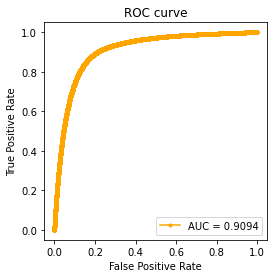

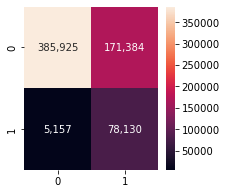

In [8]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/yeast_23/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_DelPBP1_DeepMSpeptide_fpr_msgfplus.npy', fpr)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_tpr_msgfplus.npy', tpr)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_threshold_msgfplus.npy', threshold)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_prob_msgfplus.npy', probs)
np.save('log/result_yeast_DelPBP1_DeepMSpeptide_true_msgfplus.npy', y_test)

Loading input peptides
Succesfully loaded 588859 peptides and skipped 0
588859/588859 [==============================] - 65s 110us/sample - loss: 0.7799 - acc: 0.6507 - binary_crossentropy: 0.7799
Test Accuracy: [0.7798773717649385, 0.65070415, 0.7798773]
Test AUC : 0.8234488086674785
              precision    recall  f1-score   support

       False     0.9873    0.6376    0.7748    554973
        True     0.1273    0.8655    0.2219     33886

    accuracy                         0.6507    588859
   macro avg     0.5573    0.7516    0.4984    588859
weighted avg     0.9378    0.6507    0.7430    588859



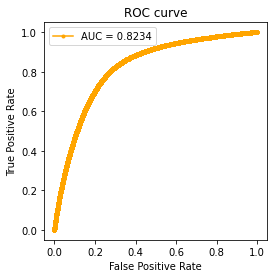

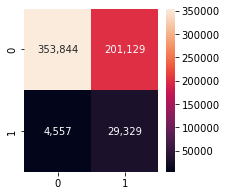

In [9]:
df_test = pd.read_csv('/data/2021_SJH_detectability/diff_tool/yeast_25/data.csv')
df_test=df_test.merge(df_merge, how='left')
df_test.Drop.fillna(False, inplace=True)
idxes=df_test.loc[df_test.Drop==True].index
df_test=df_test.drop(idxes, axis=0).reset_index(drop=True)
df_test=df_test.drop(['Drop'],axis=1)
df_test=df_test[['peptide', 'label']]#.drop_duplicates()

print('Loading input peptides')
file = df_test.peptide.values
X_test, skipped,  lines = load_pep_and_codify(file, 81)
y_test = df_test.label.values
print('Succesfully loaded {0} peptides and skipped {1}'.format(len(lines), str(skipped)))

probs = model_2_1D.predict(X_test)
# probs = 1-probs
y_pred = [1 if i>=0.5 else 0 for i in probs]
acc = model_2_1D.evaluate(X_test, y_test)

auc = roc_auc_score(y_test, probs)
print('Test Accuracy: {}'.format(acc))
print('Test AUC : {}'.format(auc))
print(classification_report(y_test, y_pred, digits=4))

plt.figure(figsize=(4, 4))
fpr, tpr, threshold = roc_curve(y_test, probs)
plt.plot(fpr, tpr, marker='.', label='AUC = {:.4f}'.format(auc), color='orange')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

cf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(3, 3))
sns.heatmap(cf_matrix, annot=True, fmt=',.0f')
plt.show()

np.save('log/result_yeast_KLife_DeepMSpeptide_fpr_msgfplus.npy', fpr)
np.save('log/result_yeast_KLife_DeepMSpeptide_tpr_msgfplus.npy', tpr)
np.save('log/result_yeast_KLife_DeepMSpeptide_threshold_msgfplus.npy', threshold)
np.save('log/result_yeast_KLife_DeepMSpeptide_prob_msgfplus.npy', probs)
np.save('log/result_yeast_KLife_DeepMSpeptide_true_msgfplus.npy', y_test)